# Quadratic Voting 

**Date:** *22 October 2024*  
**Author:** *Jinyoung Kim*

**What is it:** It is a system designed to allow voters not only to express their preferences but also to indicate how strongly they feel about a particular issue. Unlike traditional voting where each person gets one vote per issue, QV allows participants to cast multiple votes on an issue where the cost of each additional vote rises quadratically. This mechanism aims to balance majority rule with the intensity of preferences, allowing for more nuanced decision-making.


1. **Basic Example**:
    - Imagine a group of 10 people deciding on 3 proposals with 100 credits each.
    - In traditional voting, each person can give one vote per proposal.
    - In QV, they can spend multiple votes but must decide how much to spend, considering the quadratic cost. 
    - This means there is an incentive to vote honestly and represent their preferences on a sliding scale. 

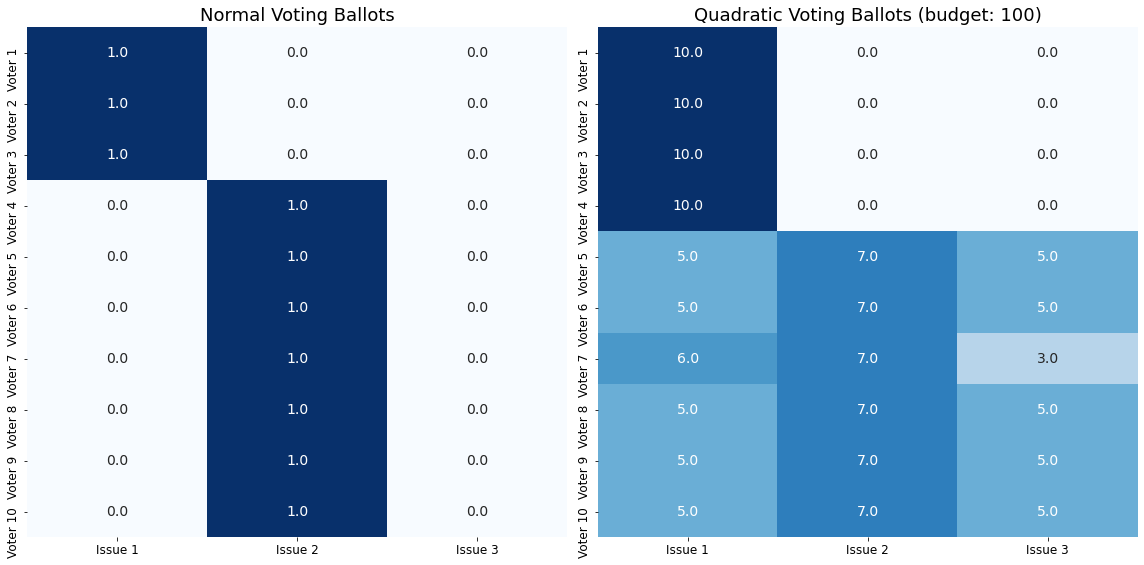

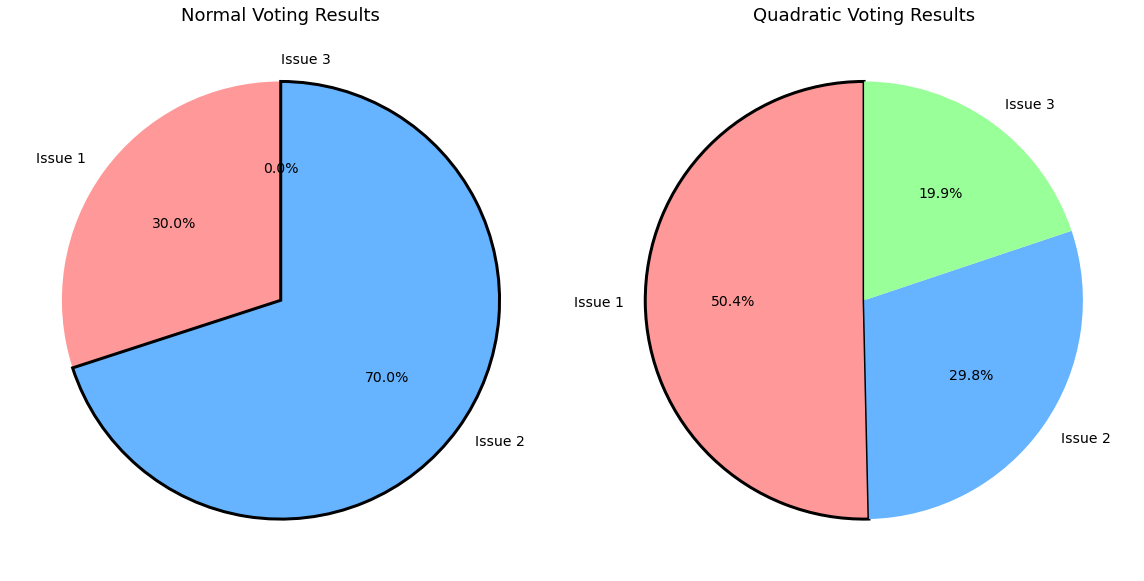

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Toy example setup
n_voters, n_issues, initial_credits = 10, 3, 100
np.random.seed(3)  # For reproducibility

# Normal voting: 1 vote for the most preferred issue
votes_normal = np.array([
    [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], 
    [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]
])

# Quadratic voting
votes_qv = np.zeros((n_voters, n_issues))
votes_qv[:4] = [10, 0, 0]  # First 4 voters strongly support Issue 1
for voter in range(4, n_voters):
    votes_qv[voter] = [6, 7, 3] if np.random.random() < 0.5 else [5, 7, 5]

# Create DataFrames for visualization
df_normal = pd.DataFrame(votes_normal, columns=[f'Issue {i+1}' for i in range(n_issues)], index=[f'Voter {i+1}' for i in range(n_voters)])
df_qv = pd.DataFrame(votes_qv, columns=[f'Issue {i+1}' for i in range(n_issues)], index=[f'Voter {i+1}' for i in range(n_voters)])

# Visualizing preferences with heatmaps
fig, ax_tables = plt.subplots(1, 2, figsize=(16, 8))

# Normal Voting Heatmap
sns.heatmap(df_normal, annot=True, cmap='Blues', cbar=False, ax=ax_tables[0], annot_kws={'size': 14}, fmt='.1f')
ax_tables[0].set_title('Normal Voting Ballots', fontsize=18)
ax_tables[0].tick_params(labelsize=12)

# Quadratic Voting Heatmap
sns.heatmap(df_qv, annot=True, cmap='Blues', cbar=False, ax=ax_tables[1], annot_kws={'size': 14}, fmt='.1f')
ax_tables[1].set_title('Quadratic Voting Ballots (budget: 100)', fontsize=18)
ax_tables[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Visualizing voting results with pie charts
total_votes_normal = votes_normal.sum(axis=0)
total_votes_qv = votes_qv.sum(axis=0)

labels = [f"Issue {i+1}" for i in range(n_issues)]
colors = ['#ff9999', '#66b3ff', '#99ff99']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Normal Voting Pie Chart
wedges, _, _ = ax1.pie(total_votes_normal, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
ax1.set_title('Normal Voting Results', fontsize=18)
wedges[np.argmax(total_votes_normal)].set_edgecolor('black')
wedges[np.argmax(total_votes_normal)].set_linewidth(3)

# Quadratic Voting Pie Chart
wedges, _, _ = ax2.pie(total_votes_qv, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
ax2.set_title('Quadratic Voting Results', fontsize=18)
wedges[np.argmax(total_votes_qv)].set_edgecolor('black')
wedges[np.argmax(total_votes_qv)].set_linewidth(3)

plt.tight_layout()
plt.show()



2. **Bet Sizing Example**:
    - In a trading team, QV could help decide which trades to prioritize based on traders' preferences.
    - Each trader is given a certain number of voting credits and casts votes based on the strength of their preferences for each trade.

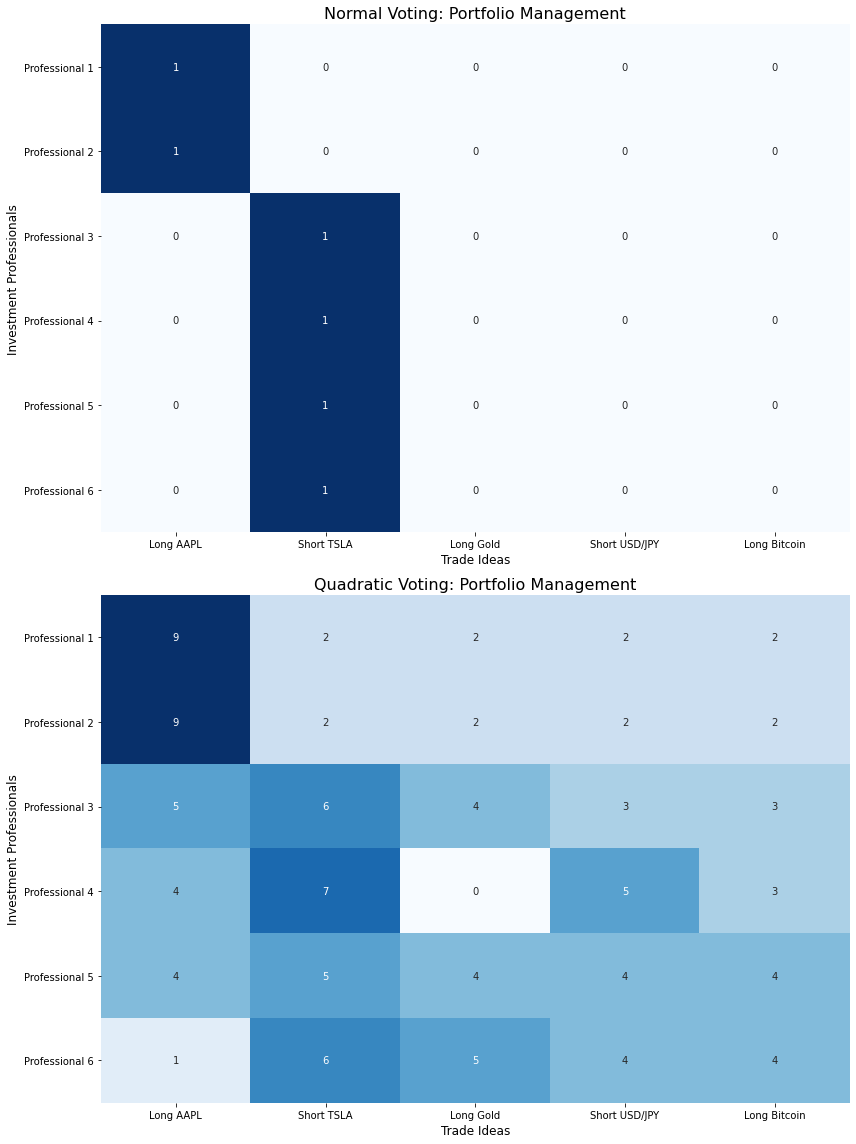


Normal Voting Results:
Long AAPL: Total votes = 2
Short TSLA: Total votes = 4
Long Gold: Total votes = 0
Short USD/JPY: Total votes = 0
Long Bitcoin: Total votes = 0

Quadratic Voting Results:
Long AAPL: Total votes = 32
Short TSLA: Total votes = 28
Long Gold: Total votes = 17
Short USD/JPY: Total votes = 20
Long Bitcoin: Total votes = 18


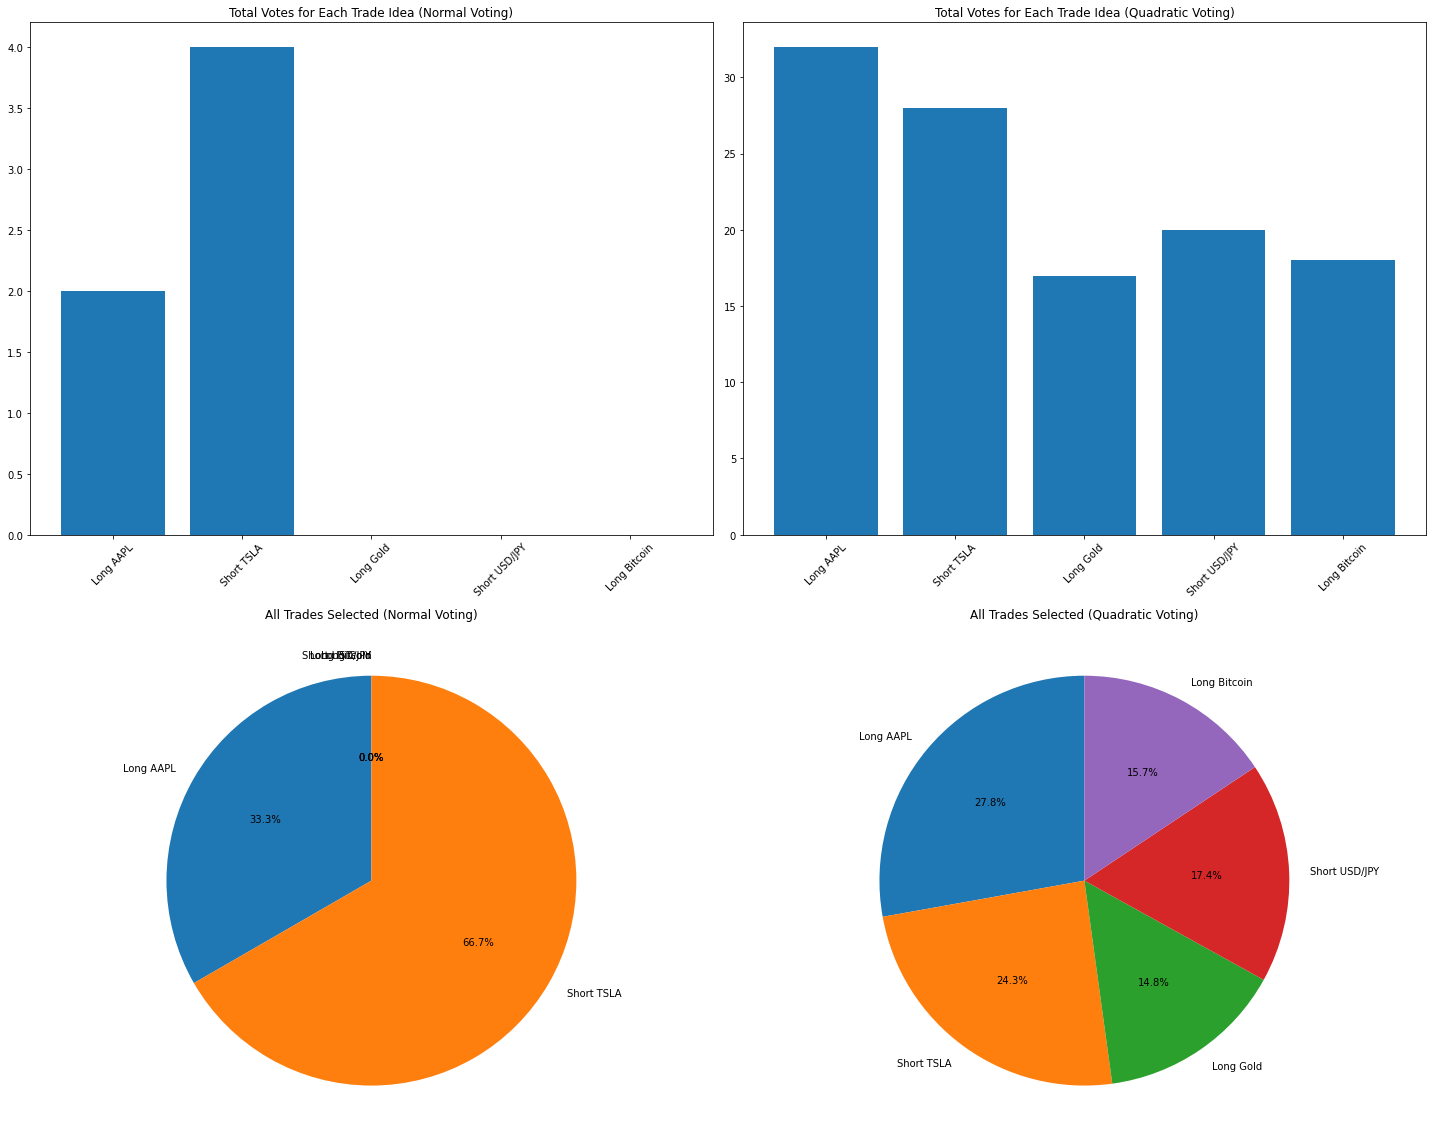


Selected Trades and Bet Sizes (Normal Voting):
Long AAPL: $333,333
Short TSLA: $666,667
Long Gold: $0
Short USD/JPY: $0
Long Bitcoin: $0

Selected Trades and Bet Sizes (Quadratic Voting):
Long AAPL: $278,261
Short TSLA: $243,478
Long Gold: $147,826
Short USD/JPY: $173,913
Long Bitcoin: $156,522


In [32]:
# Portfolio management setup
n_investment_professionals = 6
n_trade_ideas = 5
initial_credits = 100

# Trade ideas
trade_ideas = ["Long AAPL", "Short TSLA", "Long Gold", "Short USD/JPY", "Long Bitcoin"]

# Manually inserted votes
votes_normal = np.array([
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
])

votes_qv = np.array([
    [9, 2, 2, 2, 2],
    [9, 2, 2, 2, 2],
    [5, 6, 4, 3, 3],
    [4, 7, 0, 5, 3],
    [4, 5, 4, 4, 4],
    [1, 6, 5, 4, 4]
])

# Rank votes for quadratic voting
ranked_votes_qv = np.array([np.argsort(-row).argsort() + 1 for row in votes_qv])

# Create DataFrames for visualization
df_votes_normal = pd.DataFrame(votes_normal, columns=trade_ideas, index=[f'Professional {i+1}' for i in range(n_investment_professionals)])
df_votes_qv = pd.DataFrame(votes_qv, columns=trade_ideas, index=[f'Professional {i+1}' for i in range(n_investment_professionals)])

# Visualizing preferences with heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

sns.heatmap(df_votes_normal, annot=True, cmap='Blues', cbar=False, fmt='.0f', ax=ax1)
ax1.set_title('Normal Voting: Portfolio Management', fontsize=16)
ax1.set_xlabel('Trade Ideas', fontsize=12)
ax1.set_ylabel('Investment Professionals', fontsize=12)

sns.heatmap(df_votes_qv, annot=True, cmap='Blues', cbar=False, fmt='.0f', ax=ax2)
ax2.set_title('Quadratic Voting: Portfolio Management', fontsize=16)
ax2.set_xlabel('Trade Ideas', fontsize=12)
ax2.set_ylabel('Investment Professionals', fontsize=12)

plt.tight_layout()
plt.show()

# Display results
def display_results(votes, voting_type):
    total_votes = np.sum(votes, axis=0)
    print(f"\n{voting_type} Voting Results:")
    for idea, total in zip(trade_ideas, total_votes):
        print(f"{idea}: Total votes = {total}")

display_results(votes_normal, "Normal")
display_results(votes_qv, "Quadratic")

# Visualize results
total_votes_normal = np.sum(votes_normal, axis=0)
total_votes_qv = np.sum(votes_qv, axis=0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Bar plots
ax1.bar(trade_ideas, total_votes_normal)
ax1.set_title('Total Votes for Each Trade Idea (Normal Voting)')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(trade_ideas, total_votes_qv)
ax2.set_title('Total Votes for Each Trade Idea (Quadratic Voting)')
ax2.tick_params(axis='x', rotation=45)

# Pie charts for all trades
def plot_all_trades(votes, ax, title):
    ax.pie(votes, labels=trade_ideas, autopct='%1.1f%%', startangle=90)
    ax.set_title(title)

plot_all_trades(total_votes_normal, ax3, 'All Trades Selected (Normal Voting)')
plot_all_trades(total_votes_qv, ax4, 'All Trades Selected (Quadratic Voting)')

plt.tight_layout()
plt.show()

# Calculate and display bet sizes
total_portfolio_value = 1000000  # Assume $1 million portfolio

def calculate_bet_sizes(votes):
    total_votes = np.sum(votes, axis=0)
    bet_sizes = (total_votes / np.sum(total_votes)) * total_portfolio_value
    return trade_ideas, bet_sizes

print("\nSelected Trades and Bet Sizes (Normal Voting):")
trades_normal, bet_sizes_normal = calculate_bet_sizes(votes_normal)
for trade, bet_size in zip(trades_normal, bet_sizes_normal):
    print(f"{trade}: ${bet_size:,.0f}")

print("\nSelected Trades and Bet Sizes (Quadratic Voting):")
trades_qv, bet_sizes_qv = calculate_bet_sizes(votes_qv)
for trade, bet_size in zip(trades_qv, bet_sizes_qv):
    print(f"{trade}: ${bet_size:,.0f}")
